In [1]:
import kauri as kr
import kauri.bck as bck
import pickle
from scipy.optimize import minimize
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def symmetric_order(rk, tol = 1e-10):
    ew = rk.elementary_weights_map()
    m = (ew & kr.sign) * ew
    
    t = kr.Tree(None)
    while True:
        if abs(m(t) - bck.counit(t)) > tol:
            return t.nodes() - 1
        t = next(t)

In [3]:
def loss(rk, n, m):
    ew = rk.elementary_weights_map()
    s = rk.s
    loss_vec = []
    
    for i in range(n+1):
        if i % 2 == 0:
            continue
        oc = OC_of_order[i]
        for t in oc:
            loss_vec.append(ew(t))

    p = max(m,n)
    
    for i in range(1, p+1):
        if i % 2 == 1:
            continue
        oc = EC_of_order[i]
        for t in oc:
            loss_vec.append(ew(t))

    return (sum(abs(x) for x in loss_vec))

## Load order conditions

In [4]:
with open('oc.pickle', 'rb') as handle:
    OC = pickle.load(handle)

with open('ec.pickle', 'rb') as handle:
    EC = pickle.load(handle)

In [5]:
OC_of_order = []
OC_of_order.append(OC[:1])
OC_of_order.append(OC[1:2])
OC_of_order.append(OC[2:3])
OC_of_order.append(OC[3:5])
OC_of_order.append(OC[5:9])
OC_of_order.append(OC[9:18])
OC_of_order.append(OC[18:38])
OC_of_order.append(OC[38:86])
OC_of_order.append(OC[86:201])

EC_of_order = []
EC_of_order.append(EC[:1])
EC_of_order.append(EC[1:2])
EC_of_order.append(EC[2:3])
EC_of_order.append(EC[3:5])
EC_of_order.append(EC[5:9])
EC_of_order.append(EC[9:18])
EC_of_order.append(EC[18:38])
EC_of_order.append(EC[38:86])
EC_of_order.append(EC[86:201])

# EES(2,5)

In [6]:
def EES25(x):
    b1 = x
    b2 = 1/2
    b3 = 1/2 - x
    a21 = (1+2*x) / (4*(1-x))
    a31 = (4*x-1)**2 / (4*(x-1)*(1-4*x**2))
    a32 = (1-x) / (1-4*x**2)

    b = [b1, b2, b3]
    A = [[0,0,0],
        [a21, 0, 0],
        [a31, a32, 0]]

    return kr.RK(A,b)

## Check order

In [7]:
method = EES25(0.1)
print(method.order(), symmetric_order(method))

2 5


## Parameter selection

### Minimise C3 and OC7

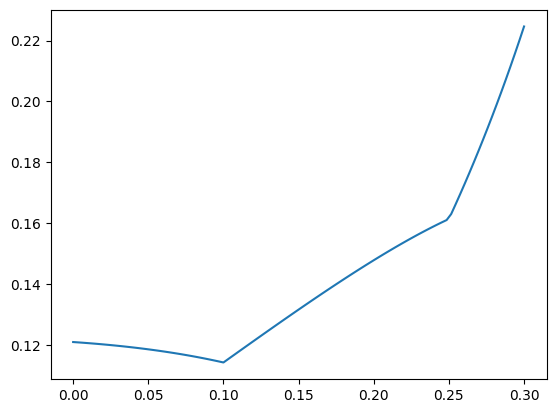

In [8]:
def loss__(x):
    n = 3
    m = 7
    return loss(EES25(x[0]), n, m)

xrange = np.linspace(0,0.3,100)
L = [loss__([y]) for y in xrange]

plt.plot(xrange, L)

In [9]:
res = minimize(loss__, np.array([0.1]), method='nelder-mead',
               options={'xatol': 1e-17, 'disp': True, 'maxiter' : 100000})
print(repr(res.x[0]))

Optimization terminated successfully.
         Current function value: 0.114390
         Iterations: 50
         Function evaluations: 105
np.float64(0.09999999999999887)


# EES(2,7)

In [10]:
def EES27(x, plus = True):
    sqrt2 = sqrt(2) if plus else - sqrt(2)
    
    b1 = x
    b2 = 0.5 * (2 - sqrt2) - (1-sqrt2) * x
    b3 = (1-sqrt2) * (x-1)
    b4 = 0.5 * (2 - sqrt2) - x

    alpha = (-2*x + sqrt2 + 1) * (2*x + sqrt2) / ((2*x - 1) * (4 * x ** 2 - 4*x - 1))
    beta = (1 + sqrt2 - 2 * x) * (2+sqrt2-2*x) / ((2*x-1)*(2*x**2 - 4*x + 1)*(4*x**2-4*x-1))
    
    a21 = (-2+sqrt2*(1-2*x))/(4*(x-1))
    a31 = (2*x + sqrt2 - 2)*(4*x + sqrt2 - 2) * alpha / (4 * sqrt2 * (x-1))
    a32 = 0.5 * (-1 + sqrt2) * alpha
    a41 = beta * (2*x -sqrt2)*(-40*x**4 + (80 - 40*sqrt2)*x**3 - (88-60*sqrt2)*x**2 + (48-34*sqrt2)*x + 7*sqrt2 - 10) / (8*(x-1)*(2*x**2 - 1))
    a42 = 0.5 * (2 - sqrt2) * x * (x-1) * (4*x + sqrt2 - 2) * beta
    a43 = (2 - sqrt2) * (2*x - sqrt2) * (2+sqrt2 - 2*x) * (x-1) * (2*x - 1) / (4 * (2*x**2 - 1) * (2*x**2 - 4*x +1))

    
    b = [b1, b2, b3, b4]
    A = [[0,0,0,0],
        [a21, 0, 0, 0],
        [a31, a32, 0, 0],
        [a41, a42, a43, 0]]

    return kr.RK(A,b)

## Check order

In [11]:
method = EES27(0.1)
print(method.order(), symmetric_order(method))

2 7


## Parameter selection

### Minimise C3 and OC9

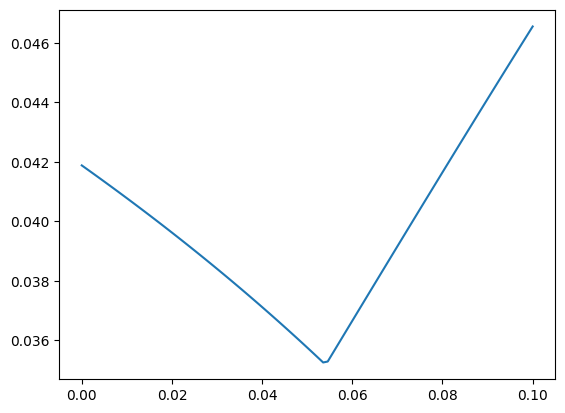

In [12]:
def loss__(x):
    n = 3
    m = 9
    return loss(EES27(x[0]), n, m)

xrange = np.linspace(0,0.1,100)
L = [loss__([y]) for y in xrange]

plt.plot(xrange, L)

In [13]:
res = minimize(loss__, np.array([0.1]), method='nelder-mead',
               options={'xatol': 1e-17, 'disp': True, 'maxiter' : 100000})
print(repr(res.x[0]))

Optimization terminated successfully.
         Current function value: 0.035169
         Iterations: 55
         Function evaluations: 117
np.float64(0.05409709377720059)


In [14]:
print((5 - 3 * sqrt(2)) / 14)

0.054097093777193885
